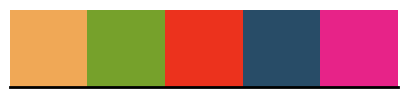

In [2]:
%load_ext autoreload
%autoreload 2
from bench_result import *
paper_path = "/home/aoli/repos/fray-paper/figs"

In [12]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench")
# display(suite.to_aggregated_dataframe())
ax = suite.to_aggregated_fig("time")
# fig = ax.get_figure()
# fig.savefig(f"{paper_path}/sctbench-time.pdf", bbox_inches='tight')

/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/3
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/26
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/10
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/25
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/12
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/15
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/7
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/1
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/13
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/0
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/14
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/19
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench/random/iter-9/21
/home/aoli/repos/sfuzz-benchmark/output/perf-1/sctbench

AttributeError: 'NoneType' object has no attribute 'group'

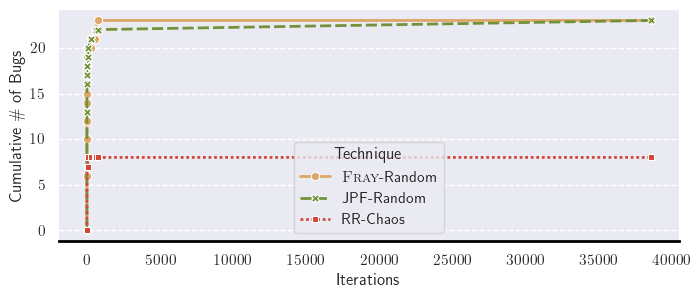

In [4]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/sctbench")
ax = suite.to_aggregated_fig("iter")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/sctbench-iter.pdf", bbox_inches='tight')

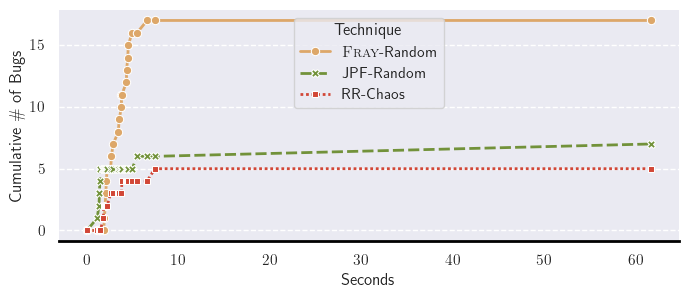

In [5]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/jacontebe")
ax = suite.to_aggregated_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-time.pdf", bbox_inches='tight')

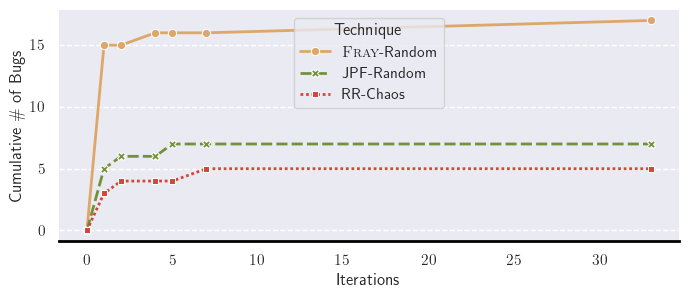

In [6]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/jacontebe")
ax = suite.to_aggregated_fig("iter")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-iter.pdf", bbox_inches='tight')

In [16]:
import pandas as pd

suite = BenchmarkSuite("/usr0/home/aoli/repos/fray-benchmark/output/bug-1/kafka")
df = suite.to_aggregated_dataframe()
pivot_df = df.pivot_table(values='id', index='Technique', columns='error', aggfunc='count', fill_value=0).reset_index().set_index("Technique")
error_data = df.pivot_table(values="id", index='Technique', columns='type', aggfunc='count', fill_value=0).reset_index().set_index("Technique")
result = pd.concat([pivot_df, error_data], axis=1).fillna(0).astype(int).reset_index()
if "Time (FP)" not in result:
    result["Time (FP)"] = 0
result['Time (FP)'] = result.apply(lambda row: f"{row['Time'] + row['Time (FP)']} ({row['Time (FP)']})", axis=1)
result.drop(columns=["Time"], inplace=True)
result.rename(columns={
    "NoError": "Success",
    "Failure": "Failure",
    "TP": "TP",
}).drop(columns=["Error"])

,Technique,Failure,Success,TP,Time (FP)
0,$\textsc{Fray}$-PCT,0,200,34,45 (0)
1,$\textsc{Fray}$-POS,0,116,98,65 (0)
2,$\textsc{Fray}$-Random,0,222,20,37 (0)
3,JPF-Random,279,0,0,0 (0)
4,RR-Chaos,1,274,3,1 (0)


In [14]:
suite = BenchmarkSuite("/usr0/home/aoli/repos/fray-benchmark/output/bug-1/lucene")
df = suite.to_aggregated_dataframe()
pivot_df = df.pivot_table(values='id', index='Technique', columns='error', aggfunc='count', fill_value=0).reset_index().set_index("Technique")
error_data = df.pivot_table(values="id", index='Technique', columns='type', aggfunc='count', fill_value=0).reset_index().set_index("Technique")
result = pd.concat([pivot_df, error_data], axis=1).fillna(0).astype(int).reset_index()
result['Time (FP)'] = result.apply(lambda row: f"{row['Time'] + row['Time (FP)']} ({row['Time (FP)']})", axis=1)
result.drop(columns=["Time"], inplace=True)
result.rename(columns={
    "NoError": "Success",
    "Failure": "Failure",
    "TP": "TP",
}).drop(columns=["Error"])

,Technique,Failure,Success,TP,Time (FP)
0,$\textsc{Fray}$-PCT,3,1174,2,7 (3)
1,$\textsc{Fray}$-POS,3,1167,4,12 (8)
2,$\textsc{Fray}$-Random,3,1176,0,7 (2)
3,JPF-Random,1186,0,0,0 (0)
4,RR-Chaos,7,1179,0,0 (0)
